<h2><font color="#004D7F" size=6>  Regresión Lineal simple</font></h2>



<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Danyela Luengas Nova</font><br>
<font color="#004D7F" size=3>Estadísitica y probabilidad </font><br>

El conjunto de datos 'Birthweight' contiene la información de 42 bebés al nacer. La pregunta de investigación es saber. &nbsp;

**Si existe una relación entre al peso al nacer y el tiempo de gestación**.  &nbsp;

La variable dependiente es Peso al nacer (dada en libras) y la variable independiente para esta actividad es la edad gestacional del bebé al nacer (en semanas).

In [1]:
# librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import math

import scipy.stats as st
import pingouin as pg


from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import statsmodels.formula.api as smf

C:\Users\daalu\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.3, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
# carga conjunto de datos

filename = 'Birthweight.csv'
raw_data = open(filename)
data = np.loadtxt(raw_data, delimiter=",",skiprows=1)
#print(data.shape)
#print(data)
#dt=pd.DataFrame(data)
X=data[:,1]
y=data[:,2]
dt=pd.DataFrame(data)
dt.columns=['indice','Edad_Gestacional','Peso']
dt.drop(['indice'], axis=1)
dt.head(5)


,indice,Edad_Gestacional,Peso
0,1.0,44.0,4.55
1,2.0,40.0,4.32
2,3.0,41.0,4.10
3,4.0,44.0,4.07
4,5.0,42.0,3.94


1 .Realiza una descripción gráfica y de medidas estadísticas (descriptivas) de los datos.

In [3]:
dt.describe()

,indice,Edad_Gestacional,Peso
count,42.000000,42.000000,42.000000
mean,21.500000,39.190476,3.312857
std,12.267844,2.643336,0.603895
min,1.000000,33.000000,1.920000
25%,11.250000,38.000000,2.940000
50%,21.500000,39.500000,3.295000
75%,31.750000,41.000000,3.647500
max,42.000000,45.000000,4.570000


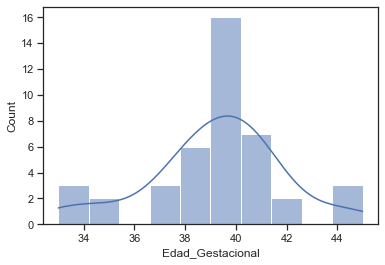

In [4]:
#Edad Gestacional 
sns.histplot(x=dt['Edad_Gestacional'], bins=10, kde=True);

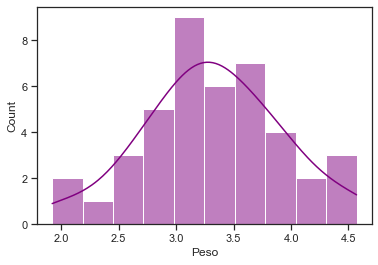

In [5]:
#Peso al nacer
sns.histplot(x=dt['Peso'], bins=10, kde=True, color='purple');

Text(0.5, 1.0, 'Media del peso ')

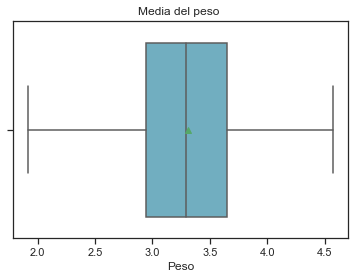

In [6]:
ax=sns.boxplot(x=dt['Peso'], color='c', showmeans=True);
ax.set_title('Media del peso ')

<font color="#004D7F" size=3>2. Realiza un análisis de regresión lineal y proporcionar estimadores puntuales de los parámetros</font><br>


Text(0.5, 0, 'Edad_gestaional')

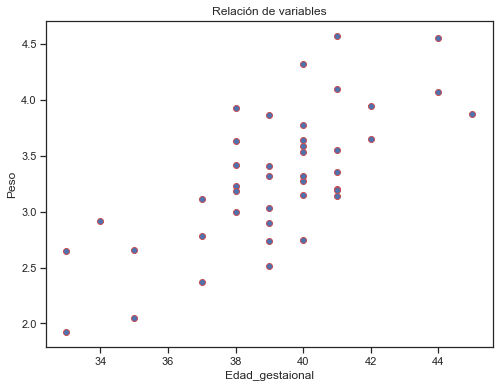

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(dt.iloc[:,1],dt.iloc[:,2], edgecolor='r' ) 
#plt.plot(dt.iloc[:,1],dt.iloc[:,2])
#plt.colorbar(ticks=[0,1,2]) # format le da
plt.title('Relación de variables')
plt.ylabel('Peso')
plt.xlabel('Edad_gestaional')

 # Creación del modelo de regresión:

In [8]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.

X =dt[['Edad_Gestacional']]

y= dt['Peso']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)


y_pred = regr.predict(X_train)

datos_train = pd.DataFrame(np.hstack((X_train, y_train)), columns=['Edad_Gestacional', 'Peso'])
modelo = smf.ols(formula = 'Peso ~Edad_Gestacional', data = datos_train)
modelo = modelo.fit()





# Resumen del modelo de Regresión

In [9]:
(modelo.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Peso   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     40.63
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           4.25e-07
Time:                        11:56:37   Log-Likelihood:                -17.304
No. Observations:                  33   AIC:                             38.61
Df Residuals:                      31   BIC:                             41.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -3.4746      1.060     -3.278      0.003      -5.636      -1.313
Edad_Gestacional     0.1723      0.027      6.374      0.000       0.117       0.227
==============================================================================
Omnibus:                        1.520   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.468   Jarque-Bera (JB):                1.366
Skew:                           0.466   Prob(JB):                        0.505
Kurtosis:                       2.646   Cond. No.                         566.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [[0.17227103]]
Independent term: 
 [-3.47460304]
Mean squared error: 0.17
Variance score: 0.57


 3. Usando el error estándar, establece intervalos de confianza al 95% para los parámetros de laregresión.
 
Un intervalo de confianza del 95% me dirá que si tomamos un número infinito de muestras de mi población, calculamos el intervalo cada vez, entonces, en el 95% de esos intervalos, el intervalo contendrá la media real de la población

El intervalo de Confianza  de  para la edad gestacinal y el peso del bebe al nacer es: (0.117, 0,227) 
El intervalo de Confianza  del 95% para la edad gestacinal y el peso del bebe al nacer es:


C:\Users\daalu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


 Edad gestacional:  (array([0.91349416]), array([0.95271899]))
 Peso:  (0.07439690968149378, 0.08335819235932253)


C:\Users\daalu\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


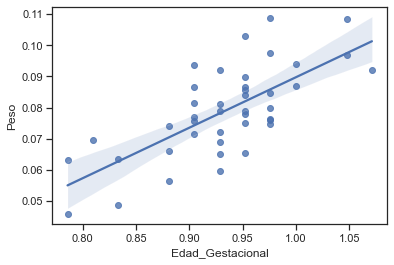

In [11]:
print('El intervalo de Confianza  de  para la edad gestacinal y el peso del bebe al nacer es: (0.117, 0,227) ')
ax = sns.regplot(X/len(X), y/len(y), ci=95)
print('El intervalo de Confianza  del 95% para la edad gestacinal y el peso del bebe al nacer es:')
print(' Edad gestacional: ', st.t.interval(alpha=0.95, df=len(X/len(X))-1, loc=np.mean(X/len(X)), scale=st.sem(X/len(X))))
print(' Peso: ',st.t.interval(alpha=0.95, df=len(y/len(y))-1, loc=np.mean(y/len(y)), scale=st.sem(y/len(y))))


4. Realiza las pruebas de hipótesis para los parámetros y para determinar la significancia de la
regresión

In [12]:
print('Según el resumen la p- value es de: 4.25e-07 ')
print('por lo tanto, se rechaza la hipotesis nula  Ho')


Según el resumen la p- value es de: 4.25e-07 
por lo tanto, se rechaza la hipotesis nula  Ho


5. Con base en tu análisis, concluye sobre el contexto del problema y responde la pregunta de
investigación



# Conclusión
Dado que p-value (4.25e-07) es menor que el nivel de significancia alpha (0.05) , existe  evidencia  para considerar que existe una relación directa  entre el peso los recien  nacidos y sus semanas de gestacion.

Sin embargo dado que La R-squared:  es de 0.567 esta en el medio  decimos que el  modelo lineal a un conjunto de observaciones no se ajusta de la mejor forma, pero tampoco se desajusta . 

In [13]:
mod2 = smf.ols('Peso ~Edad_Gestacional', data=dt).fit()   # Ajusta el modelo de regresión usando el registro natural de uno de los regresores

In [14]:
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Peso   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     40.27
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           1.54e-07
Time:                        12:07:02   Log-Likelihood:                -23.279
No. Observations:                  42   AIC:                             50.56
Df Residuals:                      40   BIC:                             54.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -3.0289      1.002     -3.024      0.004      -5.053      -1.005
Edad_Gestacional     0.1618      0.025      6.346      0.000       0.110       0.213
==============================================================================
Omnibus:                        1.087   Durbin-Watson:                   1.456
Prob(Omnibus):                  0.581   Jarque-Bera (JB):                1.120
Skew:                           0.323   Prob(JB):                        0.571
Kurtosis:                       2.529   Cond. No.                         591.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

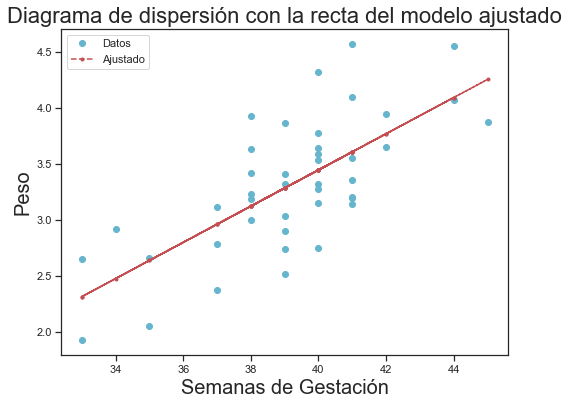

In [22]:
fig, ax = plt.subplots(figsize=(8,6))                                    # Ajuste del gráfico
ax.plot(dt["Edad_Gestacional"] , dt["Peso"] , 'o', label="Datos", color='c')                         # Ajuste para las etiquetas del gráfico
ax.plot(dt["Edad_Gestacional"], mod2.fittedvalues, 'r--.', label="Ajustado")           # Ajuste para las etiquetas del gráfico
legend = ax.legend(loc="best")                                           # Ajustes para las leyendas del gráfico
plt.xlabel('Semanas de Gestación',fontsize=20)                                          # Etiqueta del eje X
plt.ylabel('Peso', fontsize=20)                                               # Etiqueta del eje Y
plt.title('Diagrama de dispersión con la recta del modelo ajustado', fontsize=22);    # Título del gráfico